# Part 1: Data Preprocessing Pipeline (3 points)

You must implement the following four-step data preprocessing pipeline, ensuring each step is properly documented with explanations and justifications in your Jupyter Notebook.

## 1. Data Cleaning  
- Handle missing values using at least two different strategies.  
  - Explain which strategy makes the most sense in the given scenario.  
- Detect and address outliers.  
- Identify and fix inconsistencies in categorical and numerical data.  

## 2. Data Transformation  
- Normalize or standardize numerical features where necessary.  
- Encode categorical variables using appropriate encoding techniques:  
  - One-hot encoding, label encoding, etc.  
- Perform feature scaling and explain its necessity in different scenarios.  

## 3. Data Reduction  
- Apply dimensionality reduction techniques.  
- Remove redundant or irrelevant features based on logical reasoning.  
- Justify how data reduction improves performance and interpretability.  

## 4. Feature Engineering  
- Create new meaningful features using transformations, aggregations, or domain knowledge.  
- Use statistical methods (e.g., correlation analysis, feature importance) to validate the impact of new features.  
- Explain the rationale behind feature engineering choices.  

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import numpy as np

In [8]:
url = "https://raw.githubusercontent.com/krishna-koly/IMDB_TOP_1000/refs/heads/main/imdb_top_1000.csv"
df = pd.read_csv(url)

In [9]:
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None

First 5 rows:

### Important Note 
- By looking at the information above, we can observe that for the column *Released_year* the data-type associated is **object**, not **int64**. Therefore, we might have some incorrect information somewhere in this column (maybe a string instead of a number)

## **Data cleaning**

### **Removing Duplicate Rows**

To ensure data integrity, we checked for duplicate entries in our dataset using the following approache:

**Checking for Fully Identical Rows**  
   - We used `df.drop_duplicates()` to remove any completely duplicated rows.  
   - **Result:** No fully duplicated rows were found.

#### **Final Conclusion**
- **No duplicate rows were detected in the dataset.**  
- We can confidently proceed with further data cleaning and analysis.  

In [10]:
#Drow duplicate rows
df = df.drop_duplicates()

# Print how many duplicates were removed
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


### **Handling Missing Values**

We addressed missing values in the dataset using the following strategies:

1. **Identified Missing Values**  
   We found missing values in the following columns:
   - **Certificate:** 101 missing values
   - **Meta_score:** 157 missing values
   - **Gross:** 169 missing values

2. **Deciding on strategies on missing values**
   - Since the missing values in these columns range between **10%** and **17%**, simply deleting the rows would result in a significant data loss. Therefore, we chose to impute the missing values using the following strategies:
      - **Numerical columns** (`Meta_score`)
         - We will impute missing values using the **median** (to avoid bias from potential outliers)
         - Another approach would be to find another column such that both satisfy a **linear regression**. Based on the heatmap, this is not possible
      - **Categorical columns** (`Certificate`)
         - We can impute missing values with the **mode** (to ensure consistency in the dataset)
         - We can also perform a **Chi-squared test** or an **ANOVA test** in order to find out meaningful corelations. My intuition says that there might be a corelation between the `Certificate` and the `Genre`. Therefore, i will perform a `Chi-squared` test on these 2 columns since they are both **caegorical**
   - Things are not as easy when it comes to the `Gross` column. As we can see from the data overview, it has a type `object` when it should be a number (`int64` or `float64`).
   - Therefore we should convert the column to a Numeric Type and the impute the missing values with the **median** or try to find a linear regression.

#### **Conclusion**  

Handling missing values is crucial for maintaining data integrity and ensuring accurate analysis. In this dataset, we addressed missing values strategically to minimize data loss while preserving meaningful insights.  

- **Numerical values** were imputed using the **median** to avoid bias from outliers.  
- **Categorical values** were imputed using the **mode** to maintain consistency.  
- The **`Gross` column** was converted to a numeric type before imputing missing values with the prediciton base on the **linear regression** with `No_of_Votes`. 

In [11]:
#Check for missing values
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


#### `Gross` missing values approach

In [12]:
# Remove commas and convert 'Gross' to numeric type (float)
df['Gross'] = df['Gross'].replace({',': ''}, regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Check for missing values in 'Gross' after conversion
missing_gross = df['Gross'].isnull().sum()
print(f"Missing values in Gross after conversion: {missing_gross}")

Missing values in Gross after conversion: 169


In [13]:
fig = px.box(df, y='Gross', 
             title='Box Plot of Gross', 
             labels={'Gross': 'Meta_score'},
             color_discrete_sequence=['skyblue'])
fig.show()

##### Aproach I: **Insert the median**

In [ ]:
# Calculate the median of 'Gross'
# median_gross = df['Gross'].median()
#print(f"Median of Gross: {median_gross}")

# Impute the missing values in Gross with the median
# df['Gross'] = df['Gross'].fillna(median_gross)

# Verify if the missing values have been imputed
# missing_gross_after = df['Gross'].isnull().sum()
# print(f"Missing values in Gross after imputation: {missing_gross_after}")

##### Aproach II: **Linear regression**

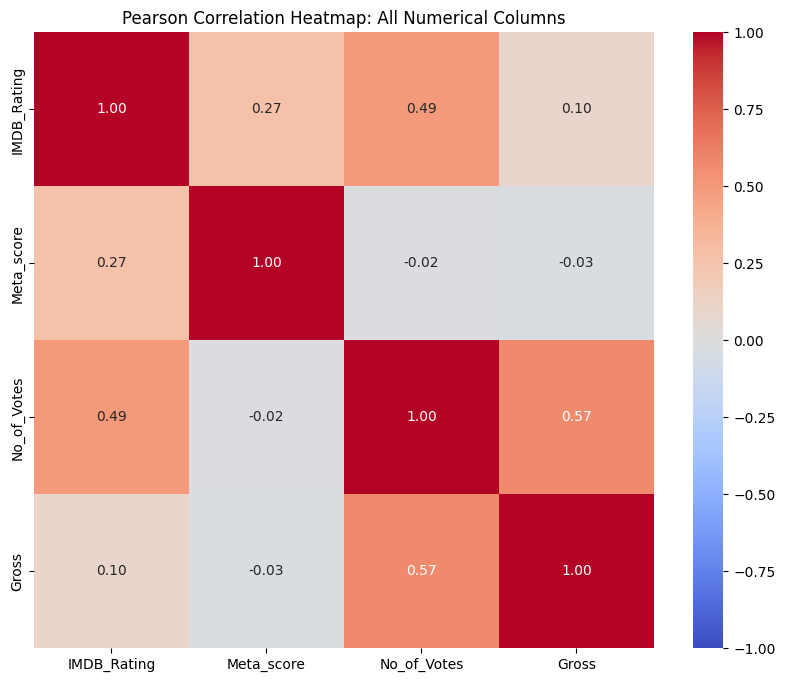

In [14]:
# Calculate Pearson correlation matrix
numerical_columns = df.select_dtypes(include=['number'])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)

plt.title("Pearson Correlation Heatmap: All Numerical Columns")
plt.show()


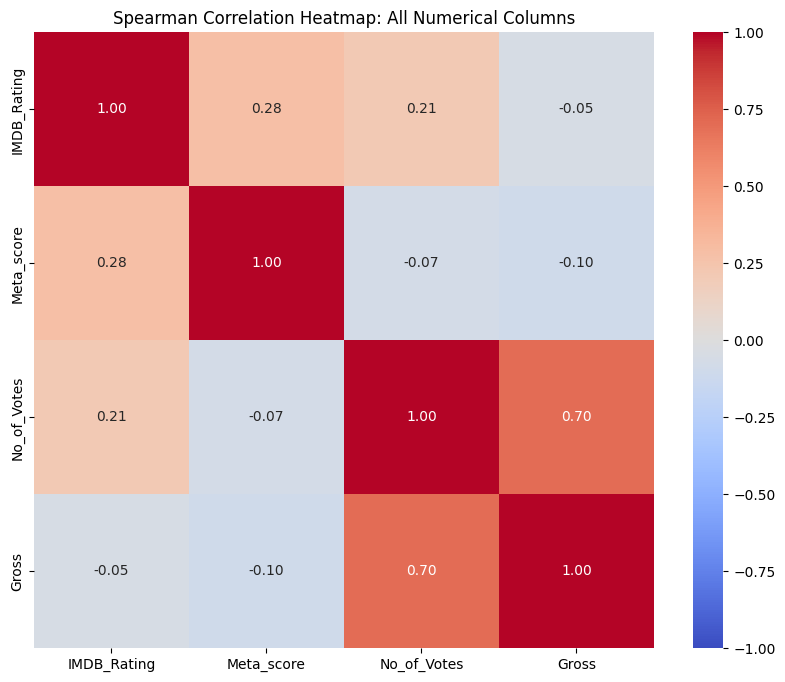

In [15]:
numerical_columns = df.select_dtypes(include=['number'])

# Calculate Spearman correlation matrix
spearman_corr_matrix = numerical_columns.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, vmin=-1, vmax=1)

plt.title("Spearman Correlation Heatmap: All Numerical Columns")
plt.show()


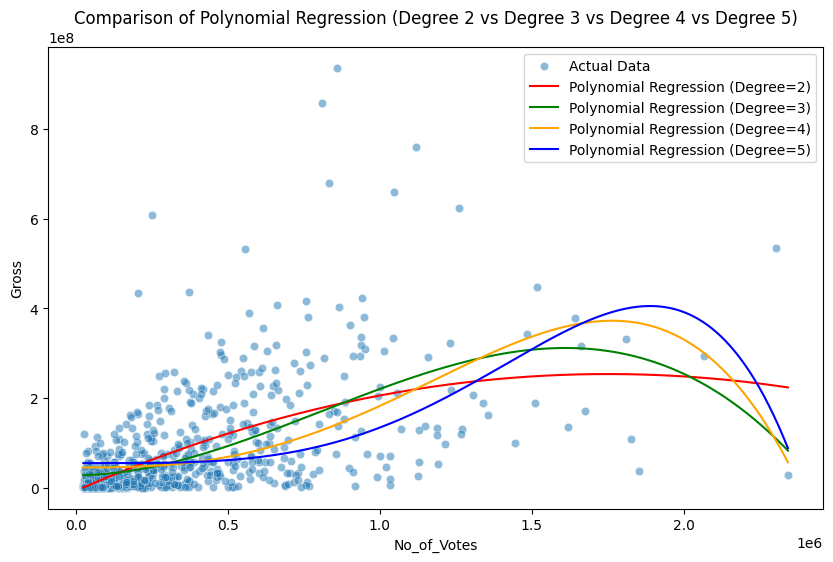

In [16]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Drop missing values
data = df[['Gross', 'No_of_Votes']].dropna()
X = data[['No_of_Votes']].values
y = data['Gross'].values

# Create a range of No_of_Votes values for smooth curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Function to fit and predict polynomial regression
def poly_fit(degree):
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(X, y)
    return poly_model.predict(X_range)

# Get predictions for degree 2 and 3
y_pred_2 = poly_fit(2)
y_pred_3 = poly_fit(3)
y_pred_4 = poly_fit(4)
y_pred_5 = poly_fit(5)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, label="Actual Data", alpha=0.5)

plt.plot(X_range, y_pred_2, label="Polynomial Regression (Degree=2)", color='red')
plt.plot(X_range, y_pred_3, label="Polynomial Regression (Degree=3)", color='green')
plt.plot(X_range, y_pred_4, label="Polynomial Regression (Degree=4)", color='orange')
plt.plot(X_range, y_pred_5, label="Polynomial Regression (Degree=5)", color='blue')

plt.xlabel("No_of_Votes")
plt.ylabel("Gross")
plt.title("Comparison of Polynomial Regression (Degree 2 vs Degree 3 vs Degree 4 vs Degree 5)")
plt.legend()
plt.show()


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Drop rows with missing values in Gross and No_of_Votes for training
data = df[['Gross', 'No_of_Votes']].dropna()

X = data[['No_of_Votes']].values  # Predictor
y = data['Gross'].values          # Target

# Apply Polynomial Features (Degree=4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Train Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)


LinearRegression()

In [18]:
# Identify rows where 'Gross' is missing
missing_gross = df['Gross'].isnull()

# Transform 'No_of_Votes' using the same Polynomial transformation
X_missing = df.loc[missing_gross, ['No_of_Votes']].values
X_missing_poly = poly.transform(X_missing)

# Predict and insert the missing values
df.loc[missing_gross, 'Gross'] = model.predict(X_missing_poly)

print(df['Gross'].isnull().sum())

0


#### `Meta_score` missing values approach

In [19]:
# Plotting the box plot for Meta_score using plotly
fig = px.box(df, y='Meta_score', 
             title='Box Plot of Meta_score', 
             labels={'Meta_score': 'Meta_score'},
             color_discrete_sequence=['skyblue'])
fig.show()


In [20]:
# Calculate the median of Meta_score
median_meta_score = df['Meta_score'].median()

# Impute the missing values in Meta_score with the median
df['Meta_score'] = df['Meta_score'].fillna(median_meta_score)

# Verify if the missing values have been imputed
missing_meta_score_after = df['Meta_score'].isnull().sum()
print(missing_meta_score_after)

0


#### `Certificate` missing values approach

##### Approach I: **Insert the mode**

In [ ]:
fig = px.bar(df, x='Certificate', 
             title='Distribution of Movie Certificates', 
             labels={'Certificate': 'Certificate'},
             color='Certificate',
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

In [ ]:
# Calculate the mode of the Certificate column
# mode_certificate = df['Certificate'].mode()[0]
# print(f"Mode of Certificate: {mode_certificate}")

# Impute the missing values in Certificate with the mode
# df['Certificate'] = df['Certificate'].fillna(mode_certificate)

# Verify if the missing values have been imputed
# missing_certificate_after = df['Certificate'].isnull().sum()
# print(f"Missing values in Certificate after imputation: {missing_certificate_after}")

##### Approach II: **Chi-squared test**

1. We need to treat each genre independently. 
- Each movie may belong to multiple genres, so we need to handle them separately.

2. Split the Genre Column:
- We can split the Genre column and split it into separate rows, effectively treating each genre as a separate categorical variable.

3. After transforming the genres into individual categories, we can perform the Chi-Squared test for each genre's correlation with the Certificate column.

In [21]:
# Before filling missing values
before_fill = df['Certificate'].isnull().sum()
before_fill_dist = df[df['Certificate'].notnull()]['Certificate'].value_counts().reset_index()
before_fill_dist.columns = ['Certificate', 'Count']
before_fill_dist['Status'] = 'Before'

In [22]:
from scipy.stats import chi2_contingency
from collections import Counter

df_exploded = df.copy()
df_exploded = df_exploded.assign(Genre=df_exploded['Genre'].str.split(', ')).explode('Genre')

certificate_counts = df_exploded.groupby(['Genre', 'Certificate']).size().reset_index(name='Count')

contingency_table = certificate_counts.pivot_table(index='Genre', columns='Certificate', values='Count', fill_value=0)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p:.100f}")

# ---------------------------------------------------------------------------------------

mode_dict = df_exploded.groupby('Genre')['Certificate'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Define a function to impute missing Certificate based on the movie's genres.
def impute_certificate(row):
    if pd.notnull(row['Certificate']):
        return row['Certificate']
    
    genres = row['Genre'].split(', ')
    
    # Look up the mode certificate for each genre.
    imputed_values = [mode_dict[g] for g in genres if g in mode_dict and mode_dict[g] is not None]
    
    # If at least one certificate was found, choose the most common one among them.
    if imputed_values:
        most_common = Counter(imputed_values).most_common(1)[0][0]
        return most_common
    else:
        return 'Unknown'

df['Certificate'] = df.apply(impute_certificate, axis=1)
print("Remaining missing Certificate count:", df['Certificate'].isnull().sum())


Chi-Squared Statistic: 906.898777101527
P-value: 0.0000000000000000000000000000000000000000000000000000000000000304612477534108273606303403289270397669
Remaining missing Certificate count: 0


In [23]:
import plotly.graph_objects as go

after_fill = df['Certificate'].isnull().sum()
after_fill_dist = df['Certificate'].value_counts().reset_index()
after_fill_dist.columns = ['Certificate', 'Count']
after_fill_dist['Status'] = 'After'

combined_df = pd.concat([before_fill_dist, after_fill_dist])

fig = go.Figure()

fig.add_trace(go.Bar(
    x=before_fill_dist['Certificate'],
    y=before_fill_dist['Count'],
    name=f"Before (Missing: {before_fill})",
    marker_color='rgba(255, 99, 132, 0.6)'
))

fig.add_trace(go.Bar(
    x=after_fill_dist['Certificate'],
    y=after_fill_dist['Count'],
    name=f"After (Missing: {after_fill})",
    marker_color='rgba(54, 162, 235, 0.6)'
))

fig.update_layout(
    title="Certificate Distribution Before and After Filling Missing Values",
    xaxis_title="Certificate",
    yaxis_title="Count",
    barmode='group',
    xaxis=dict(tickangle=90),
    template="plotly_dark"
)

fig.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


## **Data transformation**

### Data transformation and Feature Scaling

This section outlines the data preprocessing steps performed on the dataset, including cleaning the data, applying feature scaling, and encoding categorical variables.

#### 1. **Cleaning the 'Runtime' Column**

The `Runtime` column contains the runtime of movies as strings with the suffix `' min'`. This step removes the `' min'` part and converts the values to integers to ensure they are numerical and usable for analysis.

#### 2. **Handling the 'Released_Year' Column**

The `Released_Year` column, originally containing string values, is converted to numeric values. Any invalid entries (e.g., non-numeric values) are converted to `NaN`. These `NaN` values are then filled with the median value of the `Released_Year` column to ensure no missing data remains. The column is then converted to integers.

#### 3. **Handling Outliers Using the IQR Method**

Outliers can significantly impact the performance of a recommendation system. To address this, we use the **Interquartile Range (IQR) method**, which identifies and caps extreme values:

1. **Compute the IQR**: The difference between the 75th percentile (Q3) and the 25th percentile (Q1).
2. **Define Boundaries**: Outliers are values outside the range **[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]**.
3. **Cap Outliers**: Any value beyond these boundaries is clipped to the nearest valid threshold.

This method helps maintain meaningful data distribution while reducing the influence of extreme values.


#### 4. **Feature Scaling**

##### Min-Max Scaling
- Min-Max Scaling is applied to the `IMDB_Rating` and `Meta_score` columns. This transformation scales the values to a fixed range, typically between **0 and 1**. 
- This is especially useful when we want to preserve the relationship between the original data values and need them to be in a specific range, such as for models like neural networks that require input values within a certain range for optimal performance.

##### Standard Scaling
- Standard Scaling is applied to the `No_of_Votes`, `Gross`, and `Runtime` columns. This transformation adjusts the data to have a **mean of 0** and a **standard deviation of 1**. 
- Standard scaling is typically used when the features have different units or scales, and it is necessary to bring them into a comparable range. This is important for models that assume features are centered around zero and have unit variance, such as linear regression and support vector machines.

#### 4. **Encoding Categorical Variables**

##### One-Hot Encoding

- One-Hot Encoding is applied to the `Genre` column. This encoding method creates a binary (0 or 1) column for each unique category in the `Genre` column.
- This ensures that the model can properly interpret the categorical values without implying any ordinal relationship between them.

##### Frequency Encoding

Frequency Encoding is applied to the categorical columns `Director`, `Star1`, `Star2`, `Star3`, and `Star4`. This technique replaces each category with its frequency of occurrence in the dataset.
- This encoding is useful for columns with many unique values and ensures that rare categories do not result in misleading interpretations by the model.

##### Label Encoding

- Label Encoding is applied to the `Certificate` column, which contains ordinal data (categories that have an inherent order). This encoding method assigns each unique category a number, making it suitable for machine learning algorithms that can handle ordinal data.


In [24]:
# Remove the ' min' part and convert to integer
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

In [25]:
# Convert Released_Year to numeric, forcing errors to NaN and replace them with median
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

median_year = df['Released_Year'].median()
df['Released_Year'] = df['Released_Year'].fillna(median_year)
df['Released_Year'] = df['Released_Year'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int32  
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int32  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(3), int32(2), int64(1), object(10)
memory usage: 117.3+ KB


In [26]:
# Handling outliers
def winsorize_series(s, k=1.5):
    # Convert the series to numeric (coerce errors to NaN)
    s_numeric = pd.to_numeric(s, errors='coerce')

    # Calculate the 25th (Q1) and 75th (Q3) percentiles
    Q1 = s_numeric.quantile(0.25)
    Q3 = s_numeric.quantile(0.75)
    IQR = Q3 - Q1

    # Set lower and upper bounds for capping
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    # Clip values outside the bounds
    return s_numeric.clip(lower_bound, upper_bound)

# List of your numeric columns
numeric_columns = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Released_Year', 'Runtime', 'Gross']

# Apply winsorization to each numeric column
for col in numeric_columns:
    df[col] = winsorize_series(df[col])

# Optionally, display summary statistics to check the effect
print(df[numeric_columns].describe())

       IMDB_Rating   Meta_score    No_of_Votes  Released_Year      Runtime  \
count  1000.000000  1000.000000    1000.000000     1000.00000  1000.000000   
mean      7.946200    78.317875  250834.672250     1991.24750   122.285000   
std       0.264907    10.825023  253676.078174       23.22173    25.994259   
min       7.600000    52.125000   25088.000000     1926.50000    52.000000   
25%       7.700000    72.000000   55526.250000     1976.00000   103.000000   
50%       7.900000    79.000000  138548.500000     1999.00000   119.000000   
75%       8.100000    85.250000  374161.250000     2009.00000   137.000000   
max       8.700000   100.000000  852113.750000     2020.00000   188.000000   

              Gross  
count  1.000000e+03  
mean   4.752640e+07  
std    4.890255e+07  
min    1.305000e+03  
25%    5.012919e+06  
50%    4.238945e+07  
75%    6.153989e+07  
max    1.463303e+08  


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max Scaling to 'IMDB_Rating' and 'Meta_score' (Now in 0-1 range)
df[["IMDB_Rating", "Meta_score"]] = minmax_scaler.fit_transform(df[["IMDB_Rating", "Meta_score"]])
print("Applied Min-Max Scaling to IMDB_Rating and Meta_score (Now in 0-1 range).")

# Apply Standard Scaling to 'No_of_Votes', 'Gross', and 'Runtime' (Mean = 0, Std = 1)
df[["No_of_Votes", "Gross", "Runtime"]] = standard_scaler.fit_transform(df[["No_of_Votes", "Gross", "Runtime"]])
print("Applied Standard Scaling to No_of_Votes, Runtime and Gross Revenue (Mean = 0, Std = 1).")

Applied Min-Max Scaling to IMDB_Rating and Meta_score (Now in 0-1 range).
Applied Standard Scaling to No_of_Votes, Runtime and Gross Revenue (Mean = 0, Std = 1).


In [77]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for 'Genre' columns
df['Genre'] = df['Genre'].str.split(', ')

all_genres = [
    'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
    'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
    'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
    'Sport', 'Thriller', 'War', 'Western'
]

# Create one-hot encoding columns for each genre
for g in all_genres:
    df[g] = df['Genre'].apply(lambda x: 1 if g in x else 0)

# Drop the original 'Genre' column after one-hot encoding
df.drop(columns=['Genre'], inplace=True)
print("Applied One-Hot Encoding to 'Genre'")

# Apply frequency encoding to categorical columns like 'Director', 'Star1', 'Star2', etc.
categorical_columns = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']

for col in categorical_columns:
    df[col] = df[col].map(df[col].value_counts())
    print(f"Applied Frequency Encoding to '{col}'.")

# Label Encoding for ordinal categorical columns like 'Certificate'
label_encoder = LabelEncoder()
df['Certificate'] = label_encoder.fit_transform(df['Certificate'].fillna('Unknown'))
print("Applied Label Encoding to 'Certificate' column.")


# Ensure the Movie_Title column is treated as a string
df['Series_Title'] = df['Series_Title'].astype(str)

# Initialize and fit the LabelEncoder
df['Title_Encoded'] = label_encoder.fit_transform(df['Series_Title'])

# Now the 'Title_Encoded' column contains numeric representations of movie titles.
print(df[['Series_Title', 'Title_Encoded']].head())


Applied One-Hot Encoding to 'Genre'
Applied Frequency Encoding to 'Director'.
Applied Frequency Encoding to 'Star1'.
Applied Frequency Encoding to 'Star2'.
Applied Frequency Encoding to 'Star3'.
Applied Frequency Encoding to 'Star4'.
Applied Label Encoding to 'Certificate' column.
               Series_Title  Title_Encoded
0  The Shawshank Redemption            879
1             The Godfather            790
2           The Dark Knight            770
3    The Godfather: Part II            791
4              12 Angry Men              3


In [78]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   float64
 3   Certificate    1000 non-null   int32  
 4   Runtime        1000 non-null   float64
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     1000 non-null   float64
 8   Director       1000 non-null   int64  
 9   Star1          1000 non-null   int64  
 10  Star2          1000 non-null   int64  
 11  Star3          1000 non-null   int64  
 12  Star4          1000 non-null   int64  
 13  No_of_Votes    1000 non-null   float64
 14  Gross          1000 non-null   float64
 15  Action         1000 non-null   int64  
 16  Adventure      1000 non-null   int64  
 17  Animation      1000 non-null   int64  
 18  Biography

,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,...,Horror,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Title_Encoded
count,1000.00000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1991.24750,7.846000,1.136868e-16,0.314727,0.547110,3.348000,2.69200,1.454000,1.292000,1.132000,...,0.032000,0.017000,0.099000,0.125000,0.067000,0.019000,0.137000,0.051000,0.02000,498.740000
std,23.22173,5.029272,1.000500e+00,0.240825,0.226110,2.998981,2.61763,0.921267,0.703727,0.388235,...,0.176088,0.129336,0.298811,0.330884,0.250147,0.136593,0.344019,0.220108,0.14007,288.503495
min,1926.50000,0.000000,-2.705219e+00,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1976.00000,1.000000,-7.422658e-01,0.090909,0.415144,1.000000,1.00000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,248.750000
50%,1999.00000,8.000000,-1.264373e-01,0.272727,0.561358,2.000000,1.00000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,498.500000
75%,2009.00000,12.000000,5.663698e-01,0.454545,0.691906,4.000000,3.00000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,748.250000
max,2020.00000,15.000000,2.529323e+00,1.000000,1.000000,14.000000,12.00000,7.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,998.000000


## **Data reduction**

### Data Reduction: Dimensionality Reduction and Feature Removal

**Data reduction** simplifies the model, improves performance, and enhances interpretability by removing irrelevant or redundant features.

#### 1. Removing Irrelevant Features
We begin by dropping features like `Poster_Link`, `Overview`, and `Series_Title`, which don't provide useful information for predictive modeling:
- **Poster_Link**: A URL that adds no value.
- **Overview**: Text data requiring NLP for analysis.

Removing these irrelevant features reduces noise and refines the dataset.

#### 2. Removing Highly Correlated Features
Next, we calculate the **correlation matrix** to identify highly correlated features (correlation > 0.9). Removing these redundant features helps prevent **multicollinearity**, which can destabilize models and reduce predictive power. In our case, there were no highly correlated features so none was removed.

#### 3. Apply Principal Component Analysis

#### 4. Impact on Performance and Interpretability
- **Performance**: Reducing the number of features speeds up training, reduces computational costs, and prevents overfitting.
- **Interpretability**: Fewer features lead to simpler models, making it easier to interpret the results and understand feature importance.

In summary, **data reduction** optimizes the model by removing noise, improving computational efficiency, and enhancing interpretability.


##### **Remove irrelevant features & highly correlated**

In [79]:
# Drop the redundant columns from the dataframe
df.drop(columns=['Poster_Link', 'Overview', 'Series_Title'], inplace=True)

df.info()
print("Removed redundant features: 'Poster_Link', 'Overview', 'Series_Title'")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  1000 non-null   float64
 1   Certificate    1000 non-null   int32  
 2   Runtime        1000 non-null   float64
 3   IMDB_Rating    1000 non-null   float64
 4   Meta_score     1000 non-null   float64
 5   Director       1000 non-null   int64  
 6   Star1          1000 non-null   int64  
 7   Star2          1000 non-null   int64  
 8   Star3          1000 non-null   int64  
 9   Star4          1000 non-null   int64  
 10  No_of_Votes    1000 non-null   float64
 11  Gross          1000 non-null   float64
 12  Action         1000 non-null   int64  
 13  Adventure      1000 non-null   int64  
 14  Animation      1000 non-null   int64  
 15  Biography      1000 non-null   int64  
 16  Comedy         1000 non-null   int64  
 17  Crime          1000 non-null   int64  
 18  Drama    

In [80]:
# After encoding, calculate the correlation matrix
correlation_matrix = df.corr()

# Identify and drop redundant features based on correlation threshold
redundant_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            redundant_features.add(colname)

# Drop redundant features
df.drop(columns=redundant_features, inplace=True)
print(f"Dropped redundant features: {redundant_features}")

Dropped redundant features: set()


##### **Principal Component Analysis**

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Apply Principal Component Analysis
pca = PCA(n_components=12)  # Number of components can be adjusted based on the dataset
pca_transformed = pca.fit_transform(scaled_data)

# Create a new DataFrame with the principal components
df_pca = pd.DataFrame(pca_transformed, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"])

print("PCA Transformed Data (First 5 rows):")
print(df_pca.head())

PCA Transformed Data (First 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.140534  1.447899 -0.495420 -0.816340 -0.931216  0.582195  0.410969   
1  1.578352  3.626280 -1.600487 -1.428711  0.353581  0.228313  0.330691   
2  4.075841  4.526229 -0.614287 -0.190238  1.341304  0.206570 -0.354439   
3  1.678829  4.866433 -1.537633 -1.485951  1.445516 -0.649550 -0.147477   
4 -0.416921  1.499571 -1.574910 -1.019486  0.230833  0.361535 -0.035777   

        PC8       PC9      PC10      PC11      PC12  
0 -0.986903  1.679887  0.996307  1.496278 -0.848219  
1 -1.317080  1.417563  0.755478  0.376881 -0.737871  
2 -1.631304  0.184332  2.124474 -0.330698  0.038700  
3 -0.329457  1.054688  0.928426  0.137347 -0.795356  
4 -1.265224  2.046645  0.754258 -1.540786 -1.625411  


In [82]:
# Get the PCA loadings (components_)
loadings = pca.components_

# Create a DataFrame to map the loadings to feature names
loadings_df = pd.DataFrame(loadings, columns=df.select_dtypes(include=[np.number]).columns)

# Transpose the loadings DataFrame for easier access (features as rows, PCs as columns)
loadings_df = loadings_df.T  # Now rows represent features and columns represent PC1, PC2, etc.

# Assign proper column names to match the principal components (PC1, PC2, etc.)
loadings_df.columns = [f"PC{i+1}" for i in range(loadings_df.shape[1])]

# Display the column names after transposition
print("\nLoadings DataFrame Columns:")
print(loadings_df.columns)


Loadings DataFrame Columns:
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12'],
      dtype='object')


- Now that we've established what are the principal components, we should see for each one which original features it includes.


Top 5 Features for Each Principal Component:

PC1:
Gross          0.426011
No_of_Votes    0.415439
Adventure      0.372857
Drama          0.293457
Action         0.266226
Name: PC1, dtype: float64

PC2:
Runtime      0.369985
Animation    0.339557
Star1        0.307652
Comedy       0.284961
Drama        0.279535
Name: PC2, dtype: float64

PC3:
Released_Year    0.413900
Director         0.339456
Biography        0.318836
Meta_score       0.292448
Film-Noir        0.258724
Name: PC3, dtype: float64

PC4:
Thriller       0.370522
Meta_score     0.338114
Crime          0.337341
IMDB_Rating    0.283201
Action         0.259232
Name: PC4, dtype: float64


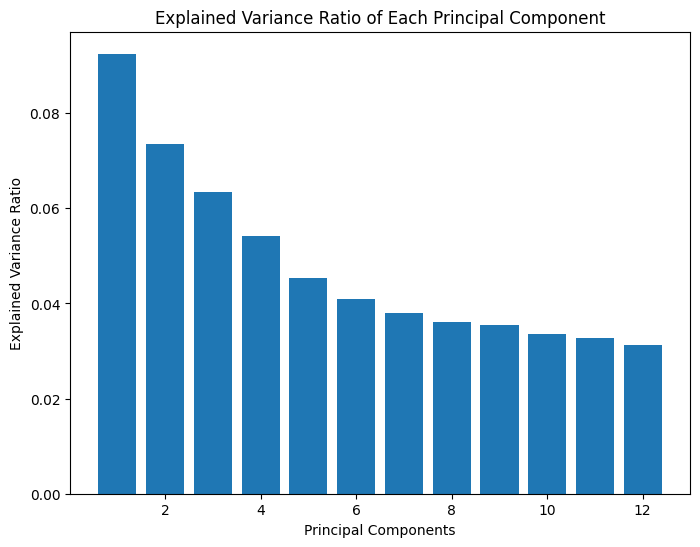

In [83]:
# To view the features contributing the most to each principal component
top_features = {}
for pc in ['PC1', 'PC2', 'PC3', 'PC4']:
    top_features[pc] = loadings_df.loc[:, pc].abs().sort_values(ascending=False).head(5)

# Display the top 5 features for each of the first 4 principal components
print("\nTop 5 Features for Each Principal Component:")
for pc, features in top_features.items():
    print(f"\n{pc}:")
    print(features)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio of Each Principal Component")
plt.show()


##### **Feature Engineering**  
Now that we have identified the most influential features in each principal component (PC), we can derive meaningful insights and assign intuitive names to them:  

- **PC1** is primarily influenced by `No_of_Votes`, `Gross`, `Adventure`, `Drama`, and `Action`. This suggests that it captures a movie's **commercial performance**, combining **box office success** and **genre appeal**. A suitable name for this feature is **"Commercial_Impact"**.  

- **PC2** is shaped by `Runtime`, `Animation`, `Star1`, `Comedy`, and `IMDB_Rating`, indicating a mix of **movie duration, entertainment value, and star influence**. It reflects the overall **engagement and entertainment quality** of a film. Therefore, we label this as **"Entertainment_Quality"**.  

- **PC3** is strongly linked to `Released_Year`, `Biography`, `Director`, `Meta_score`, and `Film-Noir`, highlighting its focus on **historical significance, directorial impact, and critical reception**. This component likely measures how **culturally and critically important** a movie is over time. Hence, we call it **"Cultural_Significance"**.  

- **PC4** is driven by `Thriller`, `Meta_score`, `Crime`, `IMDB_Rating`, and `Action`, which are associated with **intensity, critical acclaim, and strong genre elements**. This component seems to reflect how **critically intense and gripping** a movie is. Thus, we name it **"Critical_Intensity"**.  

By incorporating these computed features into our recommendation system, we can refine how movies are compared, leading to **more accurate and meaningful recommendations**. 🚀



In [84]:
def compute_pc_column(df, pc_number, top_features):
    pc_column = sum(df[feature] * loadings_df.loc[feature, f'PC{pc_number+1}'] for feature in top_features)
    return pc_column

top_features_pc1 = ['No_of_Votes', 'Gross', 'Adventure', 'Drama', 'Action']
top_features_pc2 = ['Runtime', 'Animation', 'Star1', 'Comedy', 'IMDB_Rating']
top_features_pc3 = ['Released_Year', 'Biography', 'Director', 'Meta_score', 'Drama']
top_features_pc4 = ['Thriller', 'Meta_score', 'Crime', 'IMDB_Rating', 'Action']

df['Commercial_Impact'] = compute_pc_column(df, 0, top_features_pc1)
df['Entertainment_Quality'] = compute_pc_column(df, 1, top_features_pc2)
df['Cultural_Significance'] = compute_pc_column(df, 2, top_features_pc3)
df['Critical_Intensity'] = compute_pc_column(df, 3, top_features_pc4)

print(df[['Commercial_Impact', 'Entertainment_Quality', 'Cultural_Significance', 'Critical_Intensity']].head())


   Commercial_Impact  Entertainment_Quality  Cultural_Significance  \
0           0.524524               0.817205             824.723881   
1           1.453844               1.594792             814.477541   
2           1.819115               3.113176             828.457309   
3           0.776920               4.241137             815.366427   
4           0.049630               0.777448             808.293475   

   Critical_Intensity  
0           -0.480067  
1           -0.283975  
2            0.088256  
3           -0.213350  
4           -0.255725  


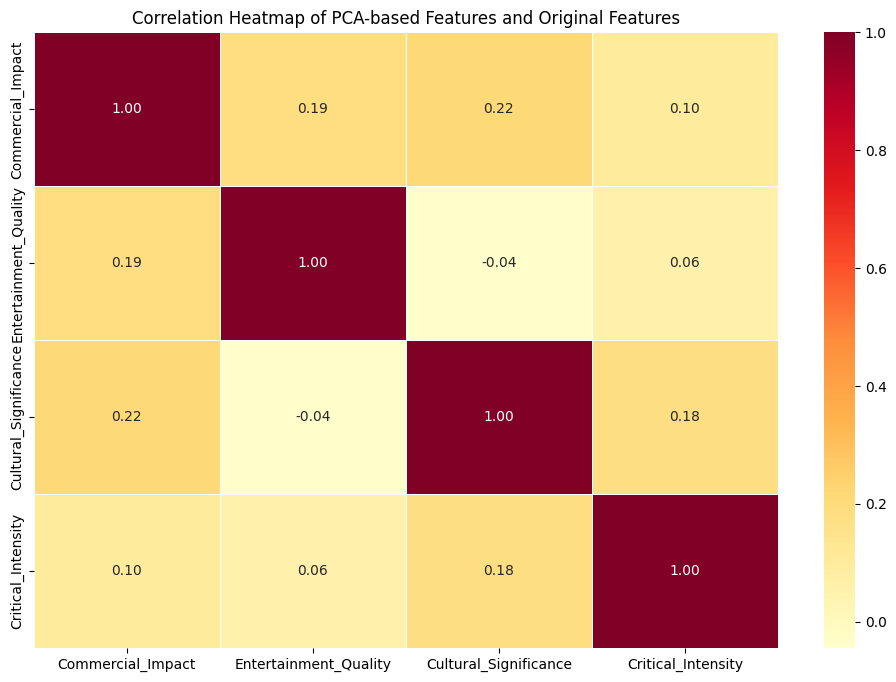

In [85]:
# Compute the correlation matrix of the newly created PCA-based columns and the original features
correlation_matrix = df[['Commercial_Impact', 'Entertainment_Quality', 'Cultural_Significance', 'Critical_Intensity']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of PCA-based Features and Original Features")
plt.show()


# **Part 2: Extracting & Visualizing Insights (3 points)**

Once the dataset has been cleaned and processed, the next step is to extract 10 meaningful metrics and present them through effective visualizations. This part of the analysis will provide a deeper understanding of the data by uncovering key patterns, distributions, trends, and anomalies. We will extract these insights using a variety of visual tools such as histograms, box plots, scatter plots, and heatmaps.

## **Requirements**:

1. **Extract 10 Key Insights**:  
   - Utilize visualizations to uncover trends, distributions, and anomalies in the dataset.
   - These insights should help answer critical questions about the dataset, such as which factors influence movie success, how various features relate to each other, and what surprising patterns can be found.
   
2. **Use of Visualizations**:  
   - Create appropriate visualizations, including but not limited to **histograms**, **box plots**, **scatter plots**, and **heatmaps**, to represent the data.
   - Each visualization should be carefully selected to convey specific insights and patterns in the dataset.

3. **Justification & Explanation**:  
   - Justify the choice of each visualization by explaining the insight it conveys.
   - Go beyond technical analysis—uncover fun, surprising, or unexpected insights that could be interesting to others. For example, is there a humorous trend between a specific movie genre and ratings? Or a surprising pattern in director influence across movie years?

4. **Shareable Insights**:  
   - Extract meaningful (and possibly funny, scary, or joyful) insights from the visualizations and share them with the team. These can be interesting for discussion, and you’ll share them with everyone as part of the analysis.


In [86]:
import plotly.express as px

fig = px.histogram(df, x='IMDB_Rating', nbins=30, title="1. Distribution of IMDB Ratings")
fig.update_layout(xaxis_title="IMDB Rating", yaxis_title="Frequency")
fig.show()

In [87]:
fig = px.scatter(df, x='IMDB_Rating', y='Gross', title="2. IMDB Rating vs. Gross Earnings")
fig.update_layout(xaxis_title="IMDB Rating", yaxis_title="Gross Earnings")
fig.show()

In [88]:
df['Released_Year'] = df['Released_Year'].astype(int)
avg_popularity = df.groupby('Released_Year')['No_of_Votes'].mean().reset_index()

fig = px.line(avg_popularity, x='Released_Year', y='No_of_Votes', title="3. Average Popularity of Movies Over Time")
fig.update_layout(xaxis_title="Year", yaxis_title="Average Number of Votes")
fig.show()


In [89]:
fig = px.scatter(df, x='Runtime', y='IMDB_Rating', title="4. Movie Length vs. IMDB Rating")
fig.update_layout(xaxis_title="Runtime (Minutes)", yaxis_title="IMDB Rating")
fig.show()


In [90]:
director_yearly_gross = df.groupby(['Released_Year', 'Director'])['Gross'].sum().reset_index()

fig = px.line(director_yearly_gross, x='Released_Year', y='Gross', color='Director', 
              title="5. Gross Earnings of Movies by Director Over Time", 
              labels={'Gross': 'Gross Earnings', 'Released_Year': 'Released Year', 'Director': 'Director'})

fig.update_layout(
    xaxis_title="Released Year", 
    yaxis_title="Gross Earnings",
    xaxis=dict(tickangle=45),
    legend_title="Director"
)

fig.show()


In [91]:
fig = px.scatter(df, x='Commercial_Impact', y='Cultural_Significance', color='Director', 
                 title='6. Commercial Impact vs Cultural Significance',
                 labels={'Commercial_Impact': 'Commercial Impact', 'Cultural_Significance': 'Cultural Significance'})
fig.update_traces(marker=dict(size=12, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')))
fig.show()


In [92]:
fig = px.scatter(df, x='Entertainment_Quality', y='Cultural_Significance', color='Director', 
                 title='7. Entertainment Quality vs Cultural Significance',
                 labels={'Entertainment_Quality': 'Entertainment Quality', 'Cultural_Significance': 'Cultural Significance'})
fig.update_traces(marker=dict(size=12, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')))
fig.show()


In [93]:
fig = px.scatter(df, x='Runtime', y='Entertainment_Quality', color='Director', 
                 title='8. Runtime vs Entertainment Quality',
                 labels={'Runtime': 'Runtime (minutes)', 'Entertainment_Quality': 'Entertainment Quality'})
fig.update_traces(marker=dict(size=12, opacity=0.8, line=dict(width=2, color='DarkSlateGrey')))
fig.show()


In [94]:
biography_movies = df[df['Biography'] == True]

fig = px.box(biography_movies, y='Cultural_Significance', color='Director',
             title='9.Cultural Significance by Genre (Biography Genre)', 
             labels={'Cultural_Significance': 'Cultural Significance', 'Genre': 'Genre'})
fig.show()


In [95]:
fig = px.scatter(df, x='Runtime', y='Gross', 
                 title="10. Gross Earnings vs. Runtime: Is Longer Always Better?", 
                 labels={'Gross': 'Gross Earnings', 'Runtime': 'Runtime (minutes)'})
fig.update_layout(xaxis_title="Runtime (minutes)", yaxis_title="Gross Earnings")
fig.show()


In [96]:
fig = px.box(df, x='Star1', y='Gross', 
             title="11. The War of the Stars: Which Star Brings in the Big Bucks?", 
             labels={'Gross': 'Gross Earnings', 'Star1': 'Star1'})
fig.update_layout(xaxis_title="Star 1", yaxis_title="Gross Earnings")
fig.show()


In [97]:
genre_cols = [
    'Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
    'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
    'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
    'Sport', 'Thriller', 'War', 'Western'
]

df_genre_by_year = df.groupby('Released_Year')[genre_cols].sum().reset_index()
df_melted = df_genre_by_year.melt(
    id_vars=['Released_Year'],
    value_vars=genre_cols,
    var_name='Genre',
    value_name='Count'
)

fig = px.line(
    df_melted, 
    x="Released_Year", 
    y="Count", 
    facet_col="Genre",
    facet_col_wrap=4,
    title="12. Yearly Trends for Each Genre"
)
fig.show()


In [98]:
fig = px.scatter(df, x='IMDB_Rating', y='Gross', 
                 title="Gross Earnings vs IMDB Rating", 
                 labels={'IMDB_Rating': 'IMDB Rating', 'Gross': 'Gross Earnings'},
                 color='IMDB_Rating', 
                 hover_data=['Director', 'Released_Year'])  # Show movie title, director, and year on hover

fig.update_layout(
    xaxis_title="IMDB Rating",
    yaxis_title="Gross Earnings",
    title="13. The Surprising Relationship Between IMDB Rating and Gross Earnings",
    xaxis=dict(tickvals=[i for i in range(1, 11)]),  # IMDB ratings are from 1 to 10
    yaxis=dict(tickprefix="$", showgrid=True)  # Adding $ sign to gross earnings
)

fig.show()


# **Part 3: Movie Recommandation System**

## Explanation of Chosen Recommendation Features

In our content-based movie recommendation system, we selected the following features to determine movie similarity:

1. **Commercial_Impact**  
   - This feature represents the financial success of a movie, including box office performance and profitability.  
   - Movies with similar commercial impact tend to appeal to the same audience.  

2. **Entertainment_Quality**  
   - This measures how engaging and enjoyable a movie is based on audience reception, screenplay, and direction.  
   - Movies with similar entertainment quality often provide a comparable viewing experience.  

3. **Cultural_Significance**  
   - Some movies leave a lasting impact on culture, influencing future films, discussions, and societal views.  
   - Movies with similar cultural significance tend to be appreciated by audiences with an interest in meaningful storytelling.  

4. **Critical_Intensity**  
   - This refers to how strongly critics react to a movie, either positively or negatively.  
   - Movies with high critical intensity often belong to specific genres (e.g., arthouse, controversial films).  

5. **IMDB_Rating**  
   - IMDB ratings reflect the overall audience perception and approval of a movie.  
   - Movies with similar ratings tend to have comparable storytelling, acting quality, and direction.  

### Why These Features?  
- These features capture **both audience preferences and critical evaluation**, ensuring a well-rounded similarity comparison.  
- They **go beyond genre-based matching** by considering deeper factors like impact and quality.  
- By using a mix of objective (IMDB Rating, Commercial Impact) and subjective (Cultural Significance, Entertainment Quality) factors, we provide **more personalized recommendations**.  

These features make our recommendation system more effective at finding movies that audiences are likely to enjoy based on real-world success and viewer engagement.  


In [99]:
from sklearn.metrics.pairwise import cosine_similarity

recommendation_features = [
    'Commercial_Impact', 
    'Entertainment_Quality', 
    'Cultural_Significance', 
    'Critical_Intensity',
    'IMDB_Rating'
] + all_genres

feature_matrix = df[recommendation_features].values
similarity_matrix = cosine_similarity(feature_matrix)

def recommend_movies(movie_title, df, similarity_matrix, title_encoder, n=5):
    """
    Given a movie title, returns the top n most similar movies based on cosine similarity
    of the recommendation features.
    """
    # Encode the input movie title
    try:
        movie_encoded = label_encoder.transform([movie_title])[0]
    except ValueError:
        print("Movie title not found in the dataset!")
        return []
    
    # Find the movie's index using the encoded title
    indices = df.index[df['Title_Encoded'] == movie_encoded].tolist()
    if not indices:
        print("Movie title not found!")
        return []
    idx = indices[0]
    
    # Get similarity scores for the movie and sort them (exclude the movie itself)
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]
    
    # Retrieve the indices of the top n similar movies
    top_indices = [i for i, score in sim_scores]
    
    # Decode the movie titles of these indices
    recommended_titles = title_encoder.inverse_transform(df['Title_Encoded'].iloc[top_indices])
    return recommended_titles

movie_to_recommend_1 = "The Godfather"
movie_to_recommend_2 = "The Notebook"
recommended_movies_1 = recommend_movies(movie_to_recommend_1, df, similarity_matrix, label_encoder, n=5)
recommended_movies_2 = recommend_movies(movie_to_recommend_2, df, similarity_matrix, label_encoder, n=5)

print(f"Recommended Movies for {movie_to_recommend_1}: {recommended_movies_1}")
print(f"Recommended Movies for {movie_to_recommend_2}: {recommended_movies_2}")

Recommended Movies for The Godfather: ['Pulp Fiction' "One Flew Over the Cuckoo's Nest" 'American Beauty'
 'Se7en' 'Rain Man']
Recommended Movies for The Notebook: ['The Fault in Our Stars' 'A Star Is Born' 'Little Women'
 'The Perks of Being a Wallflower' 'Pride & Prejudice']


In [100]:
df.to_csv("imdb_data_cleaned.csv", index=False)